# 0. Read, Inspect, Preprocess and Split Data

In [1]:
import pandas as pd

In [2]:
basePath = "/Users/phuonglh/vlp/s2s/dat/"

In [3]:
pathY = f"{basePath}y.80-19.tsv"

In [4]:
dfY = pd.read_csv(pathY, delimiter="\t", header=None)

/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,27,29,30,31,33,34,35,36,37,38,39,40,42,44,45,47,48,51,52,54,55,57,58,59,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,88,90,91,92,93,94,96,97,99,100,103,104,105,106,108,110,112,113,114,115,116,117,119,120,121,123,124,125,127,128,129,130,133,135,138,139,140,141,143,144,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
# dfY.loc[dfY[3] == '-'] # search for an anomaly line

In [6]:
dfY['MuongTe'] = pd.to_numeric(dfY.loc[:,3])
dfY['Date'] = dfY.loc[:, 0:2].apply(lambda row: '-'.join(row.values.astype(str)), axis=1)
dfY['Date'] = pd.to_datetime(dfY['Date'])

In [7]:
dfY

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,MuongTe,Date
0,1980,1,1,0.0,0.0,0,0.0,0.0,0.1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-01
1,1980,1,2,0.0,0.0,0,0.0,0.0,0.2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-02
2,1980,1,3,0.0,0.0,0,0.0,0.0,0.1,0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.1,0.0,0.0,0,0,...,0.0,0,0,0,0.0,0.0,0,0.0,0.0,0.1,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-03
3,1980,1,4,0.0,0.0,0,0.0,0.0,0.2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.2,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0.0,0,0.3,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.4,0.0,1980-01-04
4,1980,1,5,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0,0.1,0,0.8,0.0,0.0,0.8,0.0,0.1,3.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0.0,0,8.8,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.3,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.2,0,0.0,0.0,1980-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2021,12,27,3.0,1.5,0.0,1.9,0.0,5.2,2.3,0.0,1.9,0.0,1.3,0.8,0.7,4.2,6.4,2.2,1.4,6.5,2.0,5.6,3.5,0.6,5.6,0.1,0.1,7.6,4.6,1.2,2.1,1.2,3.2,2.9,0.0,2.6,9.8,1.0,0.0,...,42.2,58.4,9.1,13.0,0.0,0.0,0.0,0.0,0.0,4.5,21.4,2.8,4.2,46.0,2.6,0.0,28.3,7.1,17.9,0.5,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.2,0.0,0.0,0.3,0.0,11.5,0.2,0.0,0.0,0.0,0.7,3.0,2021-12-27
15337,2021,12,28,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.3,1.0,0.0,0.7,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.4,...,26.2,11.7,3.9,4.4,0.0,0.0,0.1,0.2,0.8,0.6,86.4,3.6,1.6,136.5,1.1,0.0,3.8,3.9,28.1,7.9,0.2,0.0,1.2,0.0,0.0,NaN,6.4,1.7,0.0,2.7,0.0,4.3,0.5,0.0,4.3,0.0,0.0,0.0,0.1,2021-12-28
15338,2021,12,29,0.0,0.1,0.1,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.0,0.6,0.0,0.0,0.1,0.9,0.1,0.8,...,1.8,0.7,4.6,0.0,0.0,0.0,0.8,0.0,0.0,0.0,17.3,0.0,0.0,37.6,0.0,0.0,0.5,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.1,0.0,0.0,12.6,0.0,2.6,0.0,0.0,0.6,0.5,0.0,0.0,0.0,2021-12-29
15339,2021,12,30,0.0,0.8,0.1,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.2,0.0,0.0,0.2,0.0,1.3,0.2,0.0,0.0,0.6,0.0,0.2,0.3,0.0,0.0,0.0,0.0,0.2,0.1,0.5,0.9,...,0.6,1.6,39.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0,11.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.1,0.0,0.2,0.0,0.0,0.5,5.0,0.0,0.0,0.0,2021-12-30


In [8]:
import matplotlib.pyplot as plt

In [9]:
def isHeavy(value):
    if value >= 50:
        return 1
    else:
        return 0

In [10]:
def isExtreme(value):
    if value >= 100:
        return 1
    else:
        return 0

In [11]:
def anomalies(value):
    if value >= 100:
        return 2
    elif value >= 50:
        return 1
    else:
        return 0

In [12]:
y = dfY['MuongTe'].apply(lambda v: isHeavy(v))

In [13]:
dfY['y'] = y

In [14]:
dfY

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,MuongTe,Date,y
0,1980,1,1,0.0,0.0,0,0.0,0.0,0.1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-01,0
1,1980,1,2,0.0,0.0,0,0.0,0.0,0.2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-02,0
2,1980,1,3,0.0,0.0,0,0.0,0.0,0.1,0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0,0.1,0.0,0.0,0,0,...,0,0,0,0.0,0.0,0,0.0,0.0,0.1,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,1980-01-03,0
3,1980,1,4,0.0,0.0,0,0.0,0.0,0.2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.2,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,0.3,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0.4,0.0,1980-01-04,0
4,1980,1,5,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0,0.1,0,0.8,0.0,0.0,0.8,0.0,0.1,3.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,8.8,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.3,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.2,0,0.0,0.0,1980-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15336,2021,12,27,3.0,1.5,0.0,1.9,0.0,5.2,2.3,0.0,1.9,0.0,1.3,0.8,0.7,4.2,6.4,2.2,1.4,6.5,2.0,5.6,3.5,0.6,5.6,0.1,0.1,7.6,4.6,1.2,2.1,1.2,3.2,2.9,0.0,2.6,9.8,1.0,0.0,...,58.4,9.1,13.0,0.0,0.0,0.0,0.0,0.0,4.5,21.4,2.8,4.2,46.0,2.6,0.0,28.3,7.1,17.9,0.5,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.2,0.0,0.0,0.3,0.0,11.5,0.2,0.0,0.0,0.0,0.7,3.0,2021-12-27,0
15337,2021,12,28,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.3,1.0,0.0,0.7,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.4,...,11.7,3.9,4.4,0.0,0.0,0.1,0.2,0.8,0.6,86.4,3.6,1.6,136.5,1.1,0.0,3.8,3.9,28.1,7.9,0.2,0.0,1.2,0.0,0.0,NaN,6.4,1.7,0.0,2.7,0.0,4.3,0.5,0.0,4.3,0.0,0.0,0.0,0.1,2021-12-28,0
15338,2021,12,29,0.0,0.1,0.1,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.2,0.0,0.6,0.0,0.0,0.1,0.9,0.1,0.8,...,0.7,4.6,0.0,0.0,0.0,0.8,0.0,0.0,0.0,17.3,0.0,0.0,37.6,0.0,0.0,0.5,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.1,0.0,0.0,12.6,0.0,2.6,0.0,0.0,0.6,0.5,0.0,0.0,0.0,2021-12-29,0
15339,2021,12,30,0.0,0.8,0.1,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.2,0.0,0.0,0.2,0.0,1.3,0.2,0.0,0.0,0.6,0.0,0.2,0.3,0.0,0.0,0.0,0.0,0.2,0.1,0.5,0.9,...,1.6,39.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.2,0.0,0.0,11.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.1,0.0,0.2,0.0,0.0,0.5,5.0,0.0,0.0,0.0,2021-12-30,0


In [15]:
sum(y)

416

In [16]:
dfY[y == 1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,MuongTe,Date,y
180,1980,6,29,52.4,95.3,114.2,157.1,103.8,130.6,116,60.2,122.6,198.0,52.6,129.8,140.5,217.6,105.9,76.9,49.7,69.3,103.5,15.3,78.9,69.3,15.3,24.3,9.5,62.6,119.2,95.3,100.8,33.1,36.9,71.7,72.8,66.3,125.5,107.5,80,...,0,1.9,0,18.4,24.3,41.9,25.9,1.4,6.9,0.0,0.0,4,0.0,4.8,4.2,1.8,0.0,8,6.9,8.8,1.1,50.9,4.2,81.1,75.5,48.0,40,42.5,4.3,37,9.9,13.6,6.4,13.2,7.7,0.9,0.5,52.4,1980-06-29,1
182,1980,7,1,61.3,51.4,7.8,0.8,17.3,3.3,5,1.4,4.2,0.0,1.9,0.0,0.0,0.0,0.0,0.1,0,11.1,0,1.0,0.0,0.0,1.0,0.0,0,11.0,15.6,0.9,0.5,0.0,0.0,0,5.5,0.0,0.9,6.4,12.5,...,0,29.3,8.3,8.6,3.4,2.4,42.5,1.6,6.7,0.2,0.0,0,0.0,3.9,0.5,3.8,0.0,6,15.1,9.2,8.4,3.5,0.0,1.1,0.0,0.0,0.7,0,0,11.7,12.8,10.6,0.0,0.0,2.2,0,9.5,61.3,1980-07-01,1
194,1980,7,13,74.5,66.7,102.8,56.5,109.2,31.3,24.7,28.6,60.3,13.5,12.4,4.1,3.9,7.3,2.9,3.8,16.5,47.2,55.5,0.1,19.6,6.2,0.1,2.7,11,2.7,25.4,6.8,13.0,19.5,61.2,55.1,1.5,2.6,7.4,5.7,5.2,...,0,0,0,3.3,0.0,0,2.1,0.0,5.5,0.0,0.0,0,0.0,0,0.5,0.0,0.0,0,2.5,0.0,0.0,0,0.0,0,0.0,0.0,0,1.9,5.3,9.8,0.0,0.8,0.0,0.0,2.2,0.7,0.0,74.5,1980-07-13,1
212,1980,7,31,93.9,26.7,45.2,6.3,20.6,1.2,1.2,0.7,6.3,0.5,5.4,2.7,20.5,3.8,0.0,0.0,2.2,29.4,22.3,0.1,0.0,0.1,0.1,6.2,0,2.5,0,0.0,4.0,0.0,0.0,0,0.0,0.0,0.0,0,0,...,0,2.6,0,6.0,5.3,1.5,0.0,3.0,2,11.4,0.0,0,6.8,0,5.0,0.0,0.0,6,0.4,0.0,0.0,0,0.0,0,0.0,0.0,18.8,0,0,19.4,14.8,2.1,10.7,0.0,0.0,9.6,0.0,93.9,1980-07-31,1
224,1980,8,12,65.4,53.8,67,2.8,39.3,1.4,0.5,0.0,3.5,0.0,27.3,7.0,8.3,0.0,0.0,0.0,20.5,28.5,3.9,0.5,0.0,6.8,0.5,5.6,9.2,183.1,0,0.6,17.7,6.7,3.9,6.8,43.2,0.0,0.0,0.1,20.5,...,0,0.1,0,0.0,18.7,1.3,0.0,5.4,2.9,0.0,0.0,0,0.0,0,9.3,11.3,0.0,1.3,9.1,16.7,0.0,4.2,22.8,3.7,9.8,0.8,0,0.8,0,0.9,0.1,0.0,22.4,11.2,16.1,6.8,7.8,65.4,1980-08-12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15202,2021,8,15,100.6,68.1,90.3,95.2,31.8,31.3,15.9,25.4,6.3,47.3,5.9,0.4,4.3,0.0,19.5,0.6,2.0,71.5,37.3,99.6,13.5,7.7,99.6,19.0,25.8,9.4,17.8,31.6,46.6,27.3,54.2,69.9,13.2,9.8,52.0,4.2,2.8,...,0.0,0.0,0.0,0.0,0.0,2.8,1.9,0.8,0.1,0.1,4.1,3.2,27.9,19.4,1.0,1.5,0.0,0.1,0.3,0.1,0.0,10.6,0.4,0.0,17.8,0.0,0.0,12.8,0.0,6.4,0.0,0.0,0.0,0.0,2.2,1.0,16.0,100.6,2021-08-15,1
15222,2021,9,4,55.8,44.4,0.5,1.4,33.8,12.0,10.7,7.0,32.1,4.7,0.0,17.0,0.1,1.0,0.0,22.6,0.0,9.9,8.6,79.7,0.0,2.6,79.7,17.0,3.2,0.3,0.0,0.0,0.0,12.1,0.1,36.6,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,5.2,17.1,25.9,221.9,43.9,19.4,9.7,0.0,0.0,0.0,0.3,10.3,7.8,3.8,53.0,9.5,52.8,5.7,1.7,33.6,6.1,25.1,5.5,2.0,5.2,8.7,4.2,2.1,3.2,0.0,12.5,55.9,88.2,19.1,32.8,55.8,2021-09-04,1
15238,2021,9,20,73.0,32.5,39.5,29.2,51.4,4.7,11.3,0.4,39.7,7.1,19.1,0.0,0.0,15.6,8.0,5.4,37.1,39.2,6.4,48.3,2.7,40.7,48.3,57.2,20.5,40.2,14.9,0.0,1.7,1.0,0.0,0.0,38.3,0.0,0.0,0.0,1.6,...,0.2,19.8,0.0,4.1,11.8,0.0,0.0,16.4,0.2,3.5,5.1,0.1,61.5,0.0,9.6,0.1,0.4,16.4,0.3,0.5,0.2,1.9,2.4,2.4,0.8,0.4,20.3,25.9,0.6,7.5,6.0,11.2,29.5,12.5,18.8,20.7,0.3,73.0,2021-09-20,1
15280,2021,11,1,88.4,96.6,73.7,6.8,31.5,3.0,10.4,8.3,2.7,0.9,10.5,0.5,1.3,0.4,1.0,0.8,6.7,47.4,3.0,15.2,0.0,1.2,15.2,4.5,7.0,7.7,8.3,4.9,4.5,3.5,5.5,1.8,11.2,5.3,10.7,8.5,10.9,...,1.4,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.1,4.1,0.0,0.0,0.0,0.0,0.0,5.9,22.1,0.0,0.1,2.4,0.0,0.0,10.3,0.0,0.0,0.2,0.0,3.3,0.0,0.0,14.0,3.4,0.0,7.4,88.4,2021-11-01,1


In [17]:
import pandas as pd
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import StandardScaler

In [18]:
featurePaths = [f"{basePath}{f}.80-19.csv" for f in ["geo", "hum", "slp", "ssm", "uvw"]]

In [19]:
print(featurePaths)

['/Users/phuonglh/vlp/s2s/dat/geo.80-19.csv', '/Users/phuonglh/vlp/s2s/dat/hum.80-19.csv', '/Users/phuonglh/vlp/s2s/dat/slp.80-19.csv', '/Users/phuonglh/vlp/s2s/dat/ssm.80-19.csv', '/Users/phuonglh/vlp/s2s/dat/uvw.80-19.csv']


In [20]:
dfs = [pd.read_csv(path) for path in featurePaths]

In [21]:
df = pd.concat(dfs, axis=1)

In [22]:
df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200
0,1501.00,5789.00,66.000015,53.000010,19.25,101440.0,0.35680,6.075012,1.625011,44.775005,9.700008
1,1503.75,5805.00,59.750010,49.500008,16.75,101400.0,0.35710,6.325008,1.000008,35.650005,8.100010
2,1507.75,5818.00,55.000008,45.750008,10.75,101428.0,0.35710,4.175007,1.475010,28.600006,9.800007
3,1528.75,5826.75,72.000015,66.250015,17.75,101723.0,0.35630,-2.099991,2.200008,29.150005,16.475010
4,1514.00,5817.25,73.500015,74.500015,15.50,101555.0,0.35630,1.725010,2.825008,30.200000,18.050010
...,...,...,...,...,...,...,...,...,...,...,...
14605,1525.00,5806.00,95.750000,96.250000,68.75,101755.0,0.35100,-2.800000,3.875000,42.700000,26.375000
14606,1519.25,5795.50,96.500000,96.000000,59.00,101765.0,0.34975,2.250000,5.275001,42.525000,30.525002
14607,1535.00,5802.50,92.000000,86.750000,35.50,101802.5,0.35200,1.950000,1.400001,36.575000,17.475000
14608,1557.75,5826.75,90.000000,78.000000,11.50,102050.0,0.35475,-0.824999,1.175002,49.050000,10.825000


In [23]:
df['Date'] = dfY['Date']
df['y'] = dfY['y']

In [24]:
features = list(df.columns.values)[0:-2] # remove the last two columns which are not the main features ('Date' and 'y')

In [25]:
df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200,Date,y
0,1501.00,5789.00,66.000015,53.000010,19.25,101440.0,0.35680,6.075012,1.625011,44.775005,9.700008,1980-01-01,0
1,1503.75,5805.00,59.750010,49.500008,16.75,101400.0,0.35710,6.325008,1.000008,35.650005,8.100010,1980-01-02,0
2,1507.75,5818.00,55.000008,45.750008,10.75,101428.0,0.35710,4.175007,1.475010,28.600006,9.800007,1980-01-03,0
3,1528.75,5826.75,72.000015,66.250015,17.75,101723.0,0.35630,-2.099991,2.200008,29.150005,16.475010,1980-01-04,0
4,1514.00,5817.25,73.500015,74.500015,15.50,101555.0,0.35630,1.725010,2.825008,30.200000,18.050010,1980-01-05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,1525.00,5806.00,95.750000,96.250000,68.75,101755.0,0.35100,-2.800000,3.875000,42.700000,26.375000,2019-12-27,0
14606,1519.25,5795.50,96.500000,96.000000,59.00,101765.0,0.34975,2.250000,5.275001,42.525000,30.525002,2019-12-28,0
14607,1535.00,5802.50,92.000000,86.750000,35.50,101802.5,0.35200,1.950000,1.400001,36.575000,17.475000,2019-12-29,0
14608,1557.75,5826.75,90.000000,78.000000,11.50,102050.0,0.35475,-0.824999,1.175002,49.050000,10.825000,2019-12-30,0


In [26]:
# train, valid, test = TSDataset.from_pandas(df, dt_col='Date', target_col='y', extra_feature_col=features, with_split=True, val_ratio=0.1, test_ratio=0.1)
train, valid, test = TSDataset.from_pandas(df, dt_col='Date', target_col='y', extra_feature_col=[], with_split=True, val_ratio=0.1, test_ratio=0.1)

In [27]:
valid.df

,H850,H500,HUM1000,HUM0850,HUM0500,SLP,SSM,U850,V850,U200,V200,Date,y,id
11688,1521.00,5863.25,83.250015,87.500015,28.750004,101705.0,0.35800,-0.049988,3.575008,21.300014,1.600010,2012-01-01,0,0
11689,1504.50,5835.50,84.250015,88.000015,28.250000,101453.0,0.35750,2.100010,3.875011,27.425010,11.950008,2012-01-02,0,0
11690,1510.50,5804.75,92.250015,93.000015,50.500010,101418.0,0.35650,0.350010,3.700012,41.775005,23.400010,2012-01-03,0,0
11691,1523.75,5786.25,98.000015,99.000015,36.250004,101810.0,0.35730,-0.974991,3.150009,52.250008,16.550010,2012-01-04,0,0
11692,1514.75,5787.75,96.250015,98.250015,12.000000,101750.0,0.35750,2.975010,4.275009,48.725006,11.750011,2012-01-05,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13144,1544.00,5852.25,96.750000,96.750000,11.250000,101937.5,0.35625,2.175001,2.600002,45.525000,-6.575000,2015-12-27,0,0
13145,1552.25,5861.75,96.250000,96.250000,10.250000,102015.0,0.35700,0.200002,5.000000,41.400000,-15.325000,2015-12-28,0,0
13146,1553.00,5846.75,96.250000,95.750000,8.750000,102050.0,0.35700,-1.774998,3.000001,41.075000,-6.475000,2015-12-29,0,0
13147,1557.75,5851.25,95.250000,96.000000,5.000000,102185.0,0.35675,-2.774999,2.450002,41.725000,8.500000,2015-12-30,0,0


# Seq2Seq Forecast

In [28]:
lookback, horizon = 7, 14

In [29]:
scaler = StandardScaler()
for data in [train, valid, test]:
    data.deduplicate() \
        .impute() \
        .gen_dt_feature() \
        .scale(scaler, fit=(data is train)) \
        .roll(lookback=lookback, horizon=horizon)

In [30]:
X, y = train.to_numpy()
X.shape, y.shape

((11668, 7, 8), (11668, 14, 1))

In [32]:
from bigdl.chronos.forecaster.seq2seq_forecaster import Seq2SeqForecaster

In [33]:
from torch import nn

In [34]:
import torch

In [35]:
extreme_weight = torch.full([1], 9.0) # make the extreme sample a large weight
loss = nn.BCEWithLogitsLoss(pos_weight=extreme_weight)

In [36]:
model = Seq2SeqForecaster(past_seq_len=lookback, future_seq_len=horizon, input_feature_num=X.shape[-1], output_feature_num=y.shape[-1], optimizer='Adam', lstm_hidden_dim=32, lstm_layer_num=1, loss=loss, lr=1e-5)

/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/pytorch_lightning/utilities/seed.py:55: UserWarning: No seed found, seed set to 2496362203
  rank_zero_warn(f"No seed found, seed set to {seed}")
Global seed set to 2496362203
Global seed set to 2496362203
/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/torch/nn/modules/rnn.py:70: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [37]:
model.fit((X, y), batch_size=32, epochs=20)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/pytorch_lightning/trainer/configuration_validator.py:133: UserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn("You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.")
/Users/phuonglh/miniconda3/envs/BDL/lib/python3.7/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:611: UserWarning: Checkpoint directory /Users/phuonglh/manuscripts/code/s2s/src/main/python/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name  | Type              | Params
--------------------------------------------
0 | model | NormalizeTSModel  | 9.9 K 
1 | loss  | BCEWithLogitsLoss | 0     
--------------------------------------------
9.9 K     

Training: 0it [00:00, ?it/s]

In [38]:
X_valid, y_valid = valid.to_numpy()

In [39]:
model.evaluate((X_valid, y_valid))

[array([[2.87056923],
        [3.70800638],
        [4.26387835],
        [5.2123313 ],
        [5.92249966],
        [6.80094528],
        [7.6509614 ],
        [7.98703146],
        [8.20855045],
        [8.38305283],
        [8.63657379],
        [8.73335266],
        [8.8470993 ],
        [8.88706779]])]

In [40]:
p_valid_s2s = model.predict(X_valid)

In [41]:
p_valid_s2s

array([[[-1.2437407],
        [-1.5837119],
        [-1.8932898],
        ...,
        [-2.6344888],
        [-2.639614 ],
        [-2.6431472]],

       [[-1.305581 ],
        [-1.6438643],
        [-1.945453 ],
        ...,
        [-2.6357083],
        [-2.6404543],
        [-2.6437368]],

       [[-0.6323097],
        [-0.8594648],
        [-1.130206 ],
        ...,
        [-2.604103 ],
        [-2.619519 ],
        [-2.6295512]],

       ...,

       [[-0.7529479],
        [-1.0112854],
        [-1.3064868],
        ...,
        [-2.6145215],
        [-2.6262772],
        [-2.6340413]],

       [[-0.8592   ],
        [-1.1411643],
        [-1.4505548],
        ...,
        [-2.6209517],
        [-2.6305072],
        [-2.6368892]],

       [[-0.9575106],
        [-1.2575068],
        [-1.5737976],
        ...,
        [-2.625442 ],
        [-2.633494 ],
        [-2.6389205]]], dtype=float32)

In [42]:
y_valid

array([[[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       ...,

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]],

       [[-0.16368978],
        [-0.16368978],
        [-0.16368978],
        ...,
        [-0.16368978],
        [-0.16368978],
        [-0.16368978]]], dtype=float32)

In [43]:
p_valid_s2s[:,:,0][:,-1]

array([-2.6431472, -2.6437368, -2.6295512, ..., -2.6340413, -2.6368892,
       -2.6389205], dtype=float32)

In [44]:
y_valid[:,:,0][:,-1]

array([-0.16368978, -0.16368978, -0.16368978, ..., -0.16368978,
       -0.16368978, -0.16368978], dtype=float32)

Text(0, 0.5, 'Normalized Predicted Value')

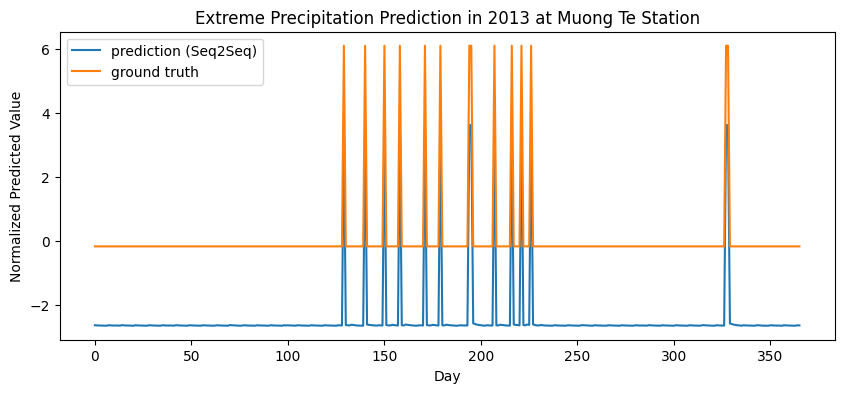

In [46]:
plt.figure(figsize=(10,4))
# plt.plot(p_valid_tcn[:,:,0][:,-1][horizon:horizon+366]) # shift horizon time steps
plt.plot(p_valid_s2s[:,:,0][:,-1][horizon+366:horizon+732])
plt.plot(y_valid[:,:,0][:,-1][366:732]) 
plt.legend(["prediction (Seq2Seq)", "ground truth"])
plt.title('Extreme Precipitation Prediction in 2013 at Muong Te Station') # 2nd year of the valid set
plt.xlabel('Day')
plt.ylabel('Normalized Predicted Value')

In [47]:
import numpy as np

In [48]:
def classify(p, epsilon=0.5):
    score = 1 / (1 + np.exp(-p))
    if score >= epsilon:
        return 1.0
    else:
        return 0.0

In [49]:
y_v = valid.unscale_numpy(y_valid)[:,:,0][:,-1][:-horizon] # the whole valid set

In [50]:
sum(y_v)

55.0

In [51]:
z_v_s2s = [classify(p) for p in p_valid_s2s[:,:,0][:,-1]][horizon:]

In [53]:
sum(z_v_s2s)

55.0

In [54]:
import sklearn
import sklearn.metrics

In [56]:
# AUC score
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_v, z_v_s2s)
sklearn.metrics.auc(fpr, tpr)

1.0

In [57]:
print(sklearn.metrics.classification_report(y_v, z_v_s2s))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1372
         1.0       1.00      1.00      1.00        55

    accuracy                           1.00      1427
   macro avg       1.00      1.00      1.00      1427
weighted avg       1.00      1.00      1.00      1427



In [59]:
X_test, y_test = test.to_numpy()

In [60]:
p_test_s2s = model.predict(X_test)

Text(0, 0.5, 'Normalized Predicted Value')

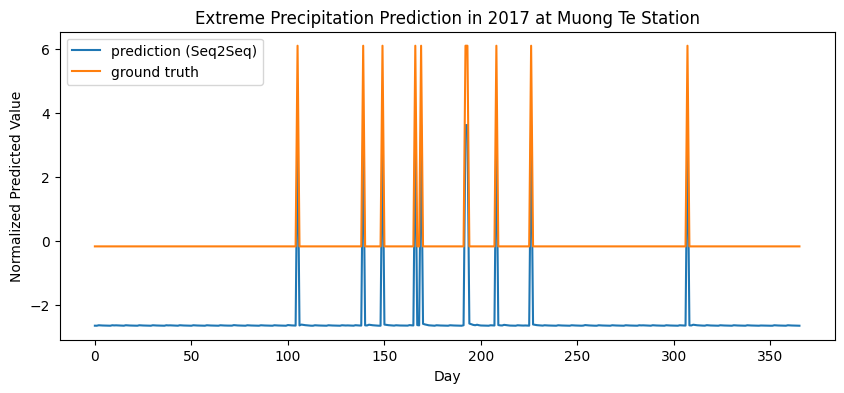

In [63]:
plt.figure(figsize=(10,4))
plt.plot(p_test_s2s[:,:,0][:,-1][horizon+366:horizon+732])
plt.plot(y_test[:,:,0][:,-1][366:732]) 
plt.legend(["prediction (Seq2Seq)", "ground truth"])
plt.title('Extreme Precipitation Prediction in 2017 at Muong Te Station')
plt.xlabel('Day')
plt.ylabel('Normalized Predicted Value')

In [64]:
y_t = test.unscale_numpy(y_test)[:,:,0][:,-1][:-horizon] # the whole test set

In [65]:
z_t_s2s = [classify(p) for p in p_test_s2s[:,:,0][:,-1]][horizon:]

In [66]:
sum(y_t), sum(z_t_s2s)

(37.0, 37.0)

In [68]:
print(sklearn.metrics.classification_report(y_t, z_t_s2s))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1390
         1.0       1.00      1.00      1.00        37

    accuracy                           1.00      1427
   macro avg       1.00      1.00      1.00      1427
weighted avg       1.00      1.00      1.00      1427

